In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
import src.dynadojo as dd
import numpy as np

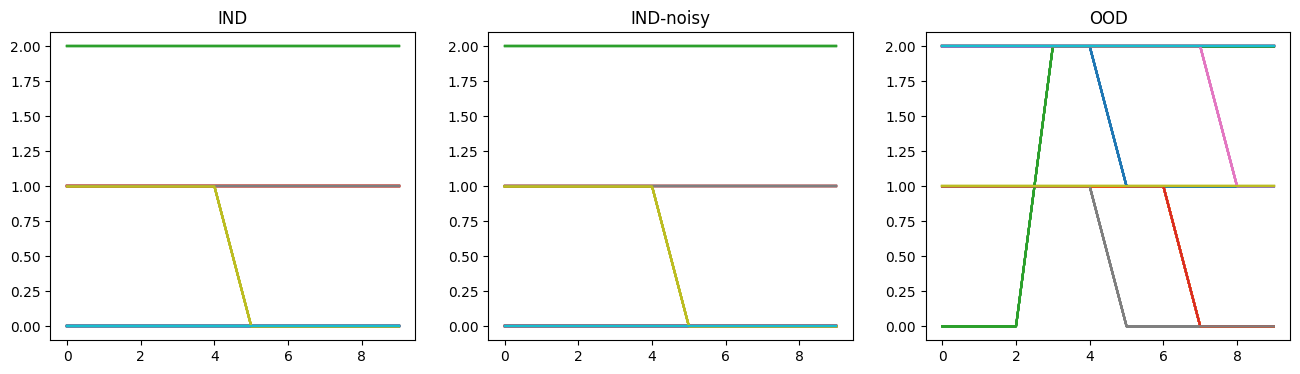

In [128]:
# SEIS model, where we can see that there are large cycles as agents become reinfected
# Here we plot each agent's trajectory and below we plot them as grouped by status
latent_dim = [10]
embed_dim = 10
n = 1
timesteps = 10
for dim in latent_dim:
    system = dd.systems.epidemic.SEISSystem(dim, embed_dim, p_recovery=0.1, noise_scale=0.1)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, control=None, noisy=True)
    y = system.make_data(y0, timesteps=timesteps, control=None)

    dd.utils.opinion.plot([x, x_noisy, y], target_dim=2, gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)

IndexError: list index out of range

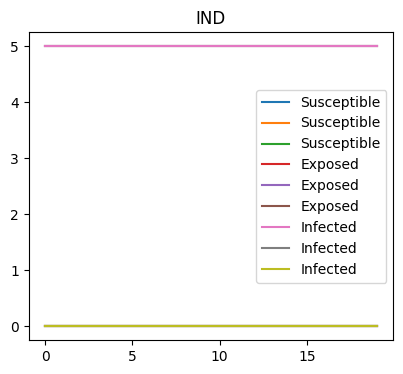

In [133]:
# SEIS model, where we plot the trajectories by their status group
latent_dim = [5]
embed_dim = 3 #Note: embdedded now is the number of groups
n = 1
timesteps = 20
for dim in latent_dim:
    system = dd.systems.epidemic.SEISSystem(dim, embed_dim, p_recovery=0.05, noise_scale=0.1, group_status=True)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, control=None, noisy=True)
    y = system.make_data(y0, timesteps=timesteps, control=None)

    dd.utils.opinion.plot([x, x_noisy, y], target_dim=2, datalabels=["Susceptible", "Exposed", "Infected"], group_status=True, gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)

YELLOW
[[1 1 1 0 2 1 2 2 1 1 1 0 1 2 0 2 0 2 0 2 0 0 1 2 0 0 1 1 0 2 1 0 0 1 0 0
  1 1 2 1]]
(1, 40)
YELLOW
[[1 1 1 1 2 1 0 0 1 0 1 2 1 2 1 0 2 2 2 1 1 0 2 2 0 2 0 0 2 2 2 0 1 0 2 0
  1 2 2 1]]
(1, 40)
[1 1 1 0 2 1 2 2 1 1 1 0 1 2 0 2 0 2 0 2 0 0 1 2 0 0 1 1 0 2 1 0 0 1 0 0 1
 1 2 1]
{0: 1, 1: 1, 2: 1, 3: 0, 4: 2, 5: 1, 6: 2, 7: 2, 8: 1, 9: 1, 10: 1, 11: 0, 12: 1, 13: 2, 14: 0, 15: 2, 16: 0, 17: 2, 18: 0, 19: 2, 20: 0, 21: 0, 22: 1, 23: 2, 24: 0, 25: 0, 26: 1, 27: 1, 28: 0, 29: 2, 30: 1, 31: 0, 32: 0, 33: 1, 34: 0, 35: 0, 36: 1, 37: 1, 38: 2, 39: 1}
[[[1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1], [1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1], [1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 2, 1], [1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 0, 

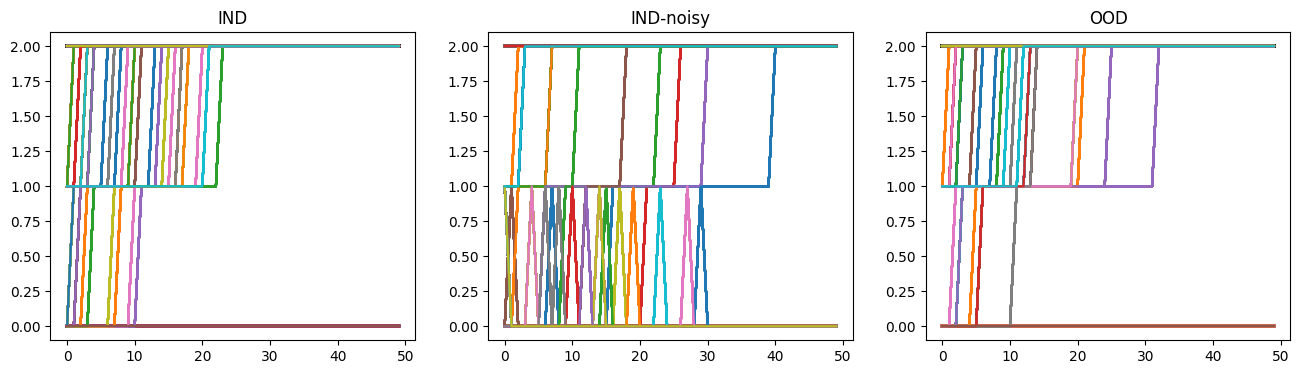

In [127]:
# SIR model, where we can see that over time most agents are "Removed" at value 2. 
# Note interesting how noise allows for those Infected to seemingly seem recovered, when that interaction pattern is not possible
latent_dim = [40]
embed_dim = 40
n = 1
timesteps = 50
for dim in latent_dim:
    system = dd.systems.epidemic.SIRSystem(dim, embed_dim, p_removal=0.1, noise_scale=0.1)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, control=None, noisy=True)
    y = system.make_data(y0, timesteps=timesteps, control=None)

    dd.utils.opinion.plot([x, x_noisy, y], target_dim=2, gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)

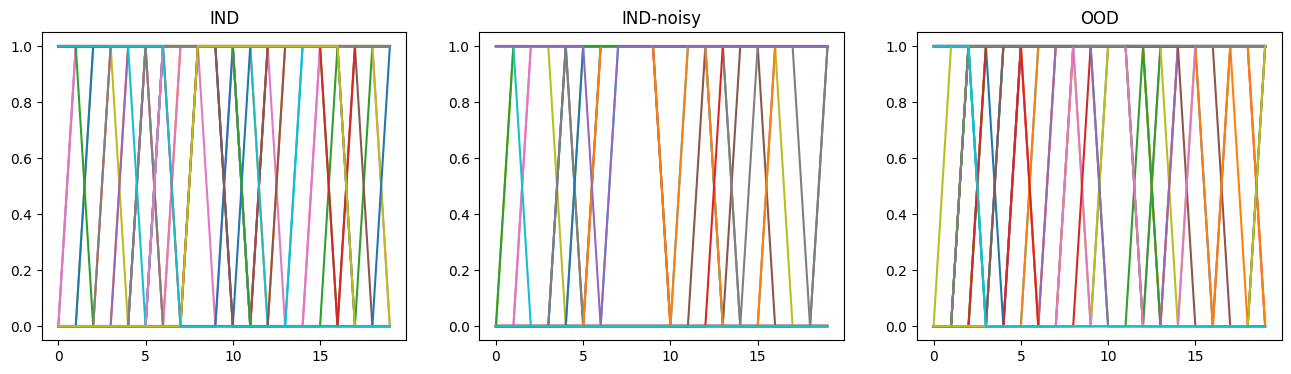

In [12]:
# SIS model, where we can see quick cycles of agents recovering
latent_dim = [40]
embed_dim = 40
n = 1
timesteps = 20
for dim in latent_dim:
    system = dd.systems.epidemic.SISSystem(dim, embed_dim, p_recovery=0.05, noise_scale=0.1)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, control=None, noisy=True)
    y = system.make_data(y0, timesteps=timesteps, control=None)

    dd.utils.opinion.plot([x, x_noisy, y], target_dim=2, gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)